<a href="https://colab.research.google.com/github/chajunhyeop/-/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#데이터불러오기
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv", encoding = 'cp949')
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [4]:
#파생변수 생성
df["하루평균구매금액"]=pd.DataFrame(df["총매출액"]/df["거래기간"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [6]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
하루평균구매금액     0
dtype: int64

In [36]:
#필요열(변수, feature)만 뽑아서 만들기
X = df[["방문빈도", "총 할인 금액"]]
Y = df["하루평균구매금액"]

print(X)

     방문빈도  총 할인 금액
0      22     5445
1      38   350995
2       2   186045
3       9     5195
4      10   246350
..    ...      ...
995    35    44445
996     6   186545
997    13   260700
998    28   347700
999    16   367045

[1000 rows x 2 columns]


In [37]:
#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#model 만들기
model = KNeighborsRegressor() #regressor 평균 구매주기가 연속형이기에 회귀형

#교차검증(k_fold)
score = cross_val_score(model, X_train, Y_train, cv=10)
print(score)

[-0.07951512 -0.20286965 -0.4565446  -0.15786864 -0.17726376 -0.17193422
 -0.21005331 -0.16463567 -0.55326989 -0.26102351]


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

X = df[["하루평균구매금액", "총 할인 금액", "방문빈도"]]
Y = df["고객등급"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#model 만들기
model = KNeighborsClassifier() #classifier "이탈여부" 범주형이기에 분류형

#검증 ( Stratified K-fold Cross-Validation test)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0)
scores = cross_val_score(model, X_train, Y_train, cv = skf)
print("교차검증 점수 :", scores)

교차검증 점수 : [0.67142857 0.67857143 0.69285714 0.63571429 0.61428571]


In [12]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=67c5e84d725c954e5a9e4f0b2ece6a28c08028726076b59df4f2d0a401a7b3b2
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [15]:
#cv와 parameter의 최적값을 찾아서 확인해야함. 
#accuracy가 높을수록 좋은 모델이다.....
##########cv가 a가되고 따른 parameter가 b가되어 accuracy가 c가되는데 이것은 내가 구하는 모델에 적절한가###########

from sklearn.model_selection import GridSearchCV

X = df[["하루평균구매금액", "총 할인 금액", "방문빈도"]]
Y = df["고객등급"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#model 만들기
model = KNeighborsClassifier() #classifier 변수"고객등급"은 범주형이기에 분류형

#그리드 인자 검색 
mylist = list(range(1,100))
k_list = [x for x in mylist if x %3 ==0]
parameter_grid = {"n_neighbors" : k_list}

#그리드 서치 
grid_search = GridSearchCV(model, parameter_grid , cv=10)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'n_neighbors': 9}

In [39]:
print(parameter_grid)

{'n_neighbors': [3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]}


In [17]:
#그리드 서치
grid_search=GridSearchCV(model, parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.00313318, 0.00242462, 0.00262938, 0.00284333, 0.00275509,
        0.00258212, 0.00300102, 0.00282991, 0.00278008, 0.00314097,
        0.00327578, 0.00275586, 0.00279627, 0.00259001, 0.00268724,
        0.00283058, 0.00315084, 0.00332172, 0.00358369, 0.00325906,
        0.00351989, 0.00402715, 0.00301943, 0.00271297, 0.0026948 ,
        0.00326927, 0.00328653, 0.00304685, 0.00369241, 0.00393424,
        0.00313768, 0.00338902, 0.00399604]),
 'std_fit_time': array([0.00138056, 0.00010716, 0.00016961, 0.00052854, 0.00044621,
        0.00027702, 0.00040437, 0.00040712, 0.00016486, 0.00059535,
        0.0009388 , 0.00033932, 0.00023406, 0.00022395, 0.00025267,
        0.00091796, 0.00089686, 0.00055949, 0.00061038, 0.00032137,
        0.0006484 , 0.00142757, 0.00053877, 0.00042568, 0.00017823,
        0.00056531, 0.00056889, 0.00025925, 0.00113051, 0.00078183,
        0.00052508, 0.00064081, 0.00079327]),
 'mean_score_time': array([0.00450852, 0.00429344, 0.004203

In [18]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [19]:
from sklearn.metrics import accuracy_score
be = grid_search.best_estimator_
pred = be.predict(X_test) #x_test 데이터로 y_pred값 도출
accuracy_score(Y_test, pred) #정확도 추출

0.6966666666666667

In [49]:
#데이터 지정(변수)
from sklearn.feature_selection import SelectKBest, chi2
X = df.drop(["고객ID", "고객등급"], axis=1)
Y = df["고객등급"]

#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)
#일변량 통계기반
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p_value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"]==True]
#p_value값을 보게되면 0.05 이하로 모든변수가 영향이 있다.

,Chi2,p_value,support,attribute
1,132.580512,3.284104e-28,True,총매출액
2,436.759048,1.072430e-75,True,구매금액대
3,29.081670,9.507211e-08,True,방문빈도
4,32.416118,1.833535e-08,True,1회 평균매출액
8,44.775912,4.536741e-11,True,클레임접수여부
14,23.982110,1.209225e-06,True,할인민감여부
15,9.366971,2.294015e-03,True,Recency
16,24.913916,7.578552e-07,True,Frequency
18,33.972912,8.538770e-09,True,평균 구매주기
19,136.828878,5.463676e-29,True,하루평균구매금액


In [21]:
from  sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#threshold = 기준점 (성능을 낮출지 높힐지), 대부분 median으로 둔다. 
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=0), threshold = "median")
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] ==True]

,attribute,support
1,총매출액,True
2,구매금액대,True
3,방문빈도,True
4,1회 평균매출액,True
5,할인권 사용 횟수,True
6,총 할인 금액,True
8,클레임접수여부,True
13,거래기간,True
18,평균 구매주기,True
19,하루평균구매금액,True


In [23]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" %Counter(Y))
print("original train data %s" %Counter(Y_train))
print("under train data %s" %Counter(Y_train_under))

original data Counter({2: 546, 1: 454})
original train data Counter({2: 384, 1: 316})
under train data Counter({1: 316, 2: 316})


In [24]:
#오버 샘플링
from imblearn.over_sampling import SMOTE #Synthetic minority over-sampling techniqe

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" %Counter(Y))
print("original train data %s" %Counter(Y_train))
print("over train data %s" %Counter(Y_train_over))


original data Counter({2: 546, 1: 454})
original train data Counter({2: 384, 1: 316})
over train data Counter({2: 384, 1: 384})


#선형회귀분석

In [25]:
#seaborn 패키지 : 데이터분석
import seaborn as sns
import numpy as np 
import pandas as pd

In [26]:
df["하루평균구매금액"].describe()

count     1000.000000
mean      1878.329981
std       2104.533256
min        434.387068
25%        812.121413
50%       1223.664825
75%       2099.191772
max      25580.575569
Name: 하루평균구매금액, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_

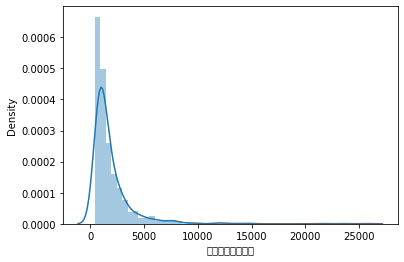

In [67]:
sns.distplot(df["하루평균구매금액"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_

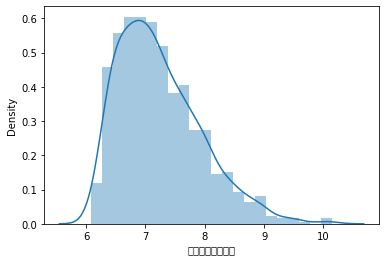

In [68]:
df["하루평균구매금액"] = np.log1p(df["하루평균구매금액"])
sns.distplot(df["하루평균구매금액"])

In [57]:


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#num : 숫자형변수    cp : 카테고리형 변수
num = ["평균 구매주기", "총매출액", "1회 평균매출액", "할인권 사용 횟수", "총 할인 금액", "구매카테고리수", "Frequency", "Monetary"]
cg = ["구매금액대", "이탈여부", "구매유형", "거주지역", "성별", "고객 나이대"]

X = df[df.고객등급 == 1][num+cg]
Y = df[df.고객등급 == 1]['하루평균구매금액']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ("onehot", OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

print(X_train[0])

[-1.06379181  1.29816413 -0.60261071 -0.72386541  0.13846089  1.39128952
  1.40785545  1.36949594  0.          1.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          1.          0.
  1.          0.          0.          0.          1.          0.
  0.          0.        ]


In [58]:
Y

0      1502.621859
1       725.957175
2       683.237074
9      1119.313752
10     1459.484890
          ...     
989     785.489942
991    1196.579459
992     506.057714
996     738.447084
998    1322.078321
Name: 하루평균구매금액, Length: 454, dtype: float64

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("trainR2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("testR2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

predict value
 [1271.93168754 1020.52164565  555.14248876  619.38806662 1423.92394596
  571.12427877 2199.8663792  1073.47055379 1268.79698599 1617.90457574
  127.91265041 1010.91917859 1033.92042491  451.08715855  871.62574792
  762.24876778  724.15054167 1386.00828787 1310.58154077 1102.21733915
  870.15369689  344.27479898 1165.00511465 1269.47625507 1268.63147716
  549.67099131 1226.04495311  269.58984765  714.81341525 1246.51130162
 1083.64704261 1754.4870818   717.25299626 1076.64297929  508.52250563
 1364.9625232  2148.84688828  773.91912281  955.91098884  505.80192756
  529.76071208 1189.91582461  572.67775727 1010.00804877  749.11896634
  953.71525972  759.39515218 1053.1760394  1548.71714644  427.52268517
  926.78016131 1189.43848257 1604.04109495 1006.31279063 1111.120586
  634.40138464  508.18765872 2348.13007637 2007.83939098 1036.50648994
  955.45217364  511.07923193  769.31719803 1349.84928492  651.38140089
 1314.30913781  690.91767174  574.12751542 1546.3601816   266.01

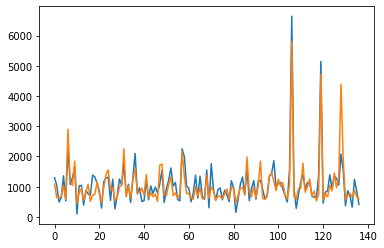

In [65]:
import pandas as pd
Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()

Y_test_df = pd.DataFrame(Y_test_df["하루평균구매금액"])
Y_test_df

Y_test_df = pd.DataFrame(Y_test)
Y_test_df = Y_test_df.reset_index()

Y_test_df = Y_test_df["하루평균구매금액"] 

import matplotlib.pyplot as plt

plt.plot(Y_pred)
plt.plot(Y_test_df)